<a href="https://colab.research.google.com/github/Soumyabrata-Mahapatra/MarksPrediction/blob/main/TSFTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name- Soumyabrata Mahapatra**

# **#2 of Task 2 - Prediction using Unsupervised Machine Learning**

# **In this task, we shall predict the optimum number of clusters and represent it visually.**

*  **Importing** **necessary** **libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* **Uploading the dataset and reading it in the form of a dataframe**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [3]:
Iris=pd.read_csv('Iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
Iris.columns=['Id','Sepal Length(Cm)','Sepal Width(Cm)','Petal Length(Cm)','Petal Width(Cm)','Species']
Iris

,Id,Sepal Length(Cm),Sepal Width(Cm),Petal Length(Cm),Petal Width(Cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


* **Checking the existence of null values in the dataset**

In [5]:
pd.isnull(Iris).sum()

Id                  0
Sepal Length(Cm)    0
Sepal Width(Cm)     0
Petal Length(Cm)    0
Petal Width(Cm)     0
Species             0
dtype: int64

**Hence there does not exist any null value in the dataset**.

In [6]:
#Getting detailed information about the dataframe

Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                150 non-null    int64  
 1   Sepal Length(Cm)  150 non-null    float64
 2   Sepal Width(Cm)   150 non-null    float64
 3   Petal Length(Cm)  150 non-null    float64
 4   Petal Width(Cm)   150 non-null    float64
 5   Species           150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Getting statistical information about the dataframe


Iris.describe()

,Id,Sepal Length(Cm),Sepal Width(Cm),Petal Length(Cm),Petal Width(Cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
#Checking the distribution based on the category of the species

Iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# **Data Visualization**

In [8]:
#Scatterplot using Plotly showing the properties of Sepal

px.scatter(Iris,'Sepal Length(Cm)',	'Sepal Width(Cm)',color='Species')

In [9]:
#Scatterplot using Plotly showing the properties of Petal

px.scatter(Iris,'Petal Length(Cm)',	'Petal Width(Cm)',color='Species')

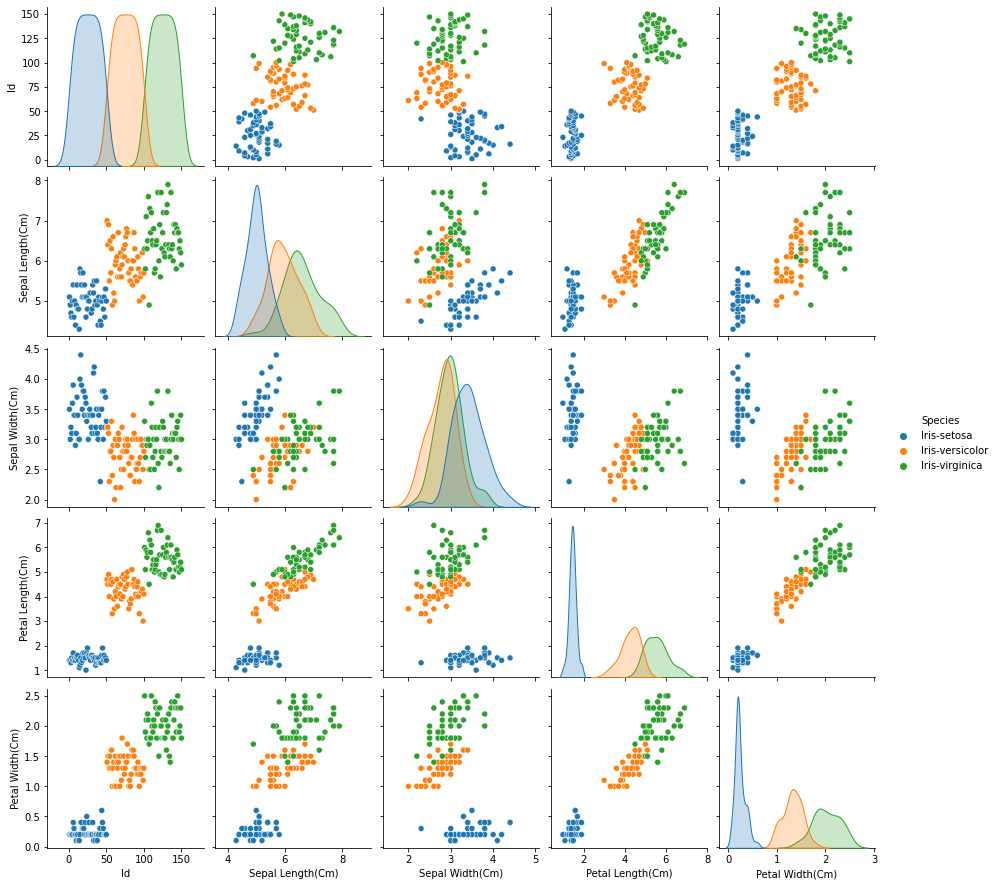

In [10]:
#Pairplot using Seaborn

sns.pairplot(Iris,hue='Species')

**Here we do not have any particular target variable.** **In stead, we need to** **partition the data into a number of clusters. Hence** **we shall use** **K-Means Clustering algorithm**.

# **Preparation for K-Means Clustering**

In [11]:
#Creating a separate dataframe from the main Iris dataframe 

X=Iris[['Sepal Length(Cm)','Sepal Width(Cm)','Petal Length(Cm)','Petal Width(Cm)']]
X

,Sepal Length(Cm),Sepal Width(Cm),Petal Length(Cm),Petal Width(Cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


* **Importing the KMeans algorithm, creating instance and fitting our dataset for** **finding the optimum number of clusters**

In [12]:
from sklearn.cluster import KMeans
kmeans=KMeans()

wcss = []

for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

* **Plotting the above results for getting an elbow-shaped curve**

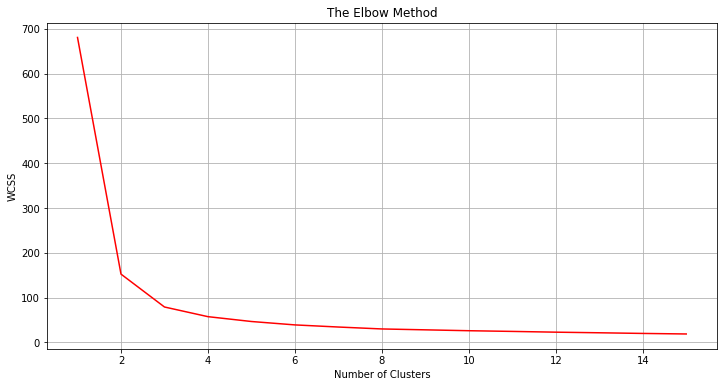

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), wcss,color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

**The optimum cluster is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**
**From the above graph, it is clear that the distortion goes down rapidly until when the number of clusters is 2 and the curve almost becomes flattened after the number of clusters becomes 4.**

**So we choose the optimum number of clusters as 3.**

In [15]:
#Creating instance for prediction

predictions=kmeans.predict(X)

In [17]:
#Finding the inertia value

kmeans.inertia_

18.686927489177492

# **Visualizing the clusters**

In [18]:
#Applying K-Means to the dataset taking number of clusters=3

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y= kmeans.fit_predict(X)

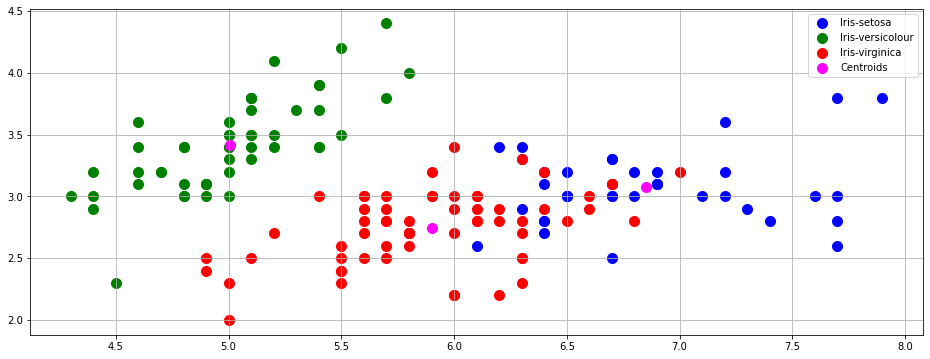

In [26]:
plt.figure(figsize=(16,6))
plt.scatter(X.values[y== 0, 0], X.values[y== 0, 1], 
            s = 100, color= 'blue', label = 'Iris-setosa')
plt.scatter(X.values[y== 1, 0], X.values[y== 1, 1], 
            s = 100, color = 'green', label = 'Iris-versicolour')
plt.scatter(X.values[y== 2, 0], X.values[y== 2, 1],
            s = 100, color = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, color = 'magenta', label = 'Centroids')

plt.grid()

plt.legend()

**Thus we have successfully predicted the optimum number of clusters for the 'Iris' dataset using Unsupervised Machine Learning.**